In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
customers = pd.read_csv("Customers.csv")


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
customers = pd.read_csv("Transactions.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
customers = pd.read_csv("Products.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [ ]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [ ]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [ ]:
print(merged_data[["Price_x", "Price_y"]].head())


   Price_x  Price_y
0   300.68   300.68
1   300.68   300.68
2   300.68   300.68
3   300.68   300.68
4   300.68   300.68


In [ ]:
merged_data.rename(columns={"Price_x": "TransactionPrice", "Price_y": "ProductPrice"}, inplace=True)


In [ ]:
clustering_data = customer_features.drop("CustomerID", axis=1)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)
customer_features["Cluster"] = clusters


In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(clustering_data, clusters)
print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 0.5611739947209046


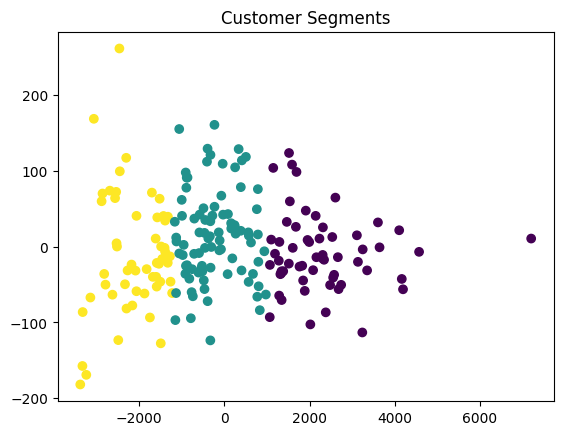

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Segments")
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Calculate DB Index
db_index = davies_bouldin_score(clustering_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Calculate Silhouette Score (optional)
silhouette_avg = silhouette_score(clustering_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 0.5611739947209046
Silhouette Score: 0.5337635828881694


In [ ]:
# Assuming 'CustomerID' is the column with the concatenated string
customer_features = customer_features.drop("CustomerID", axis=1)
# Now calculate the cluster summary without the 'CustomerID' column
cluster_summary = customer_features.groupby("Cluster").mean()
print(cluster_summary)


          TotalValue   Quantity  TransactionPrice
Cluster                                          
0        5754.035517  19.586207        295.418114
1        3227.222955  12.045455        281.849117
2        1363.507170   6.433962        229.095403


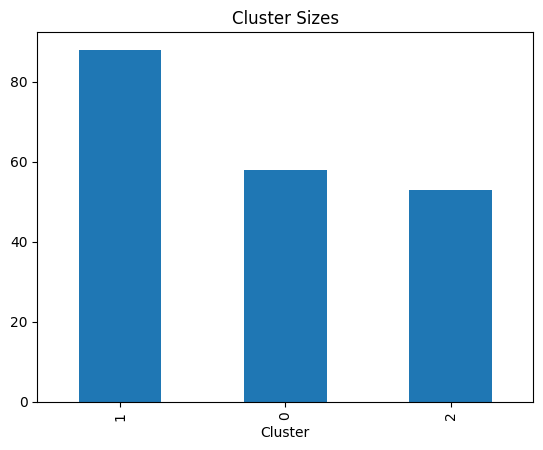

In [ ]:
cluster_sizes = customer_features["Cluster"].value_counts()
cluster_sizes.plot(kind='bar', title="Cluster Sizes")
plt.show()


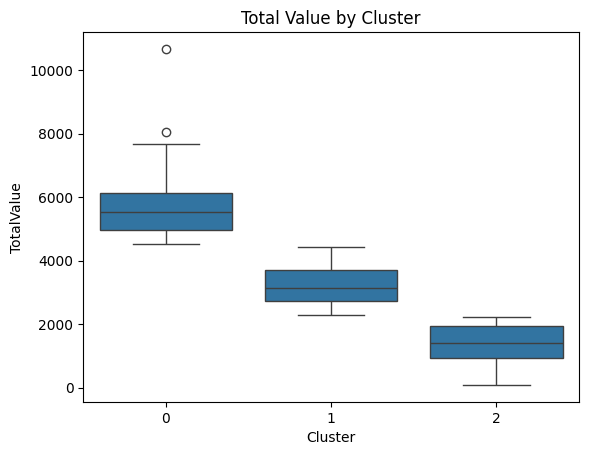

In [ ]:
import seaborn as sns
sns.boxplot(x="Cluster", y="TotalValue", data=customer_features)
plt.title("Total Value by Cluster")
plt.show()


In [ ]:
customer_features.to_csv("Customer_Clusters.csv", index=False)
